In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
pth = os.path.join('..', '..', '..')
pth_data = os.path.join(pth, 'data')
pth_pred = os.path.join(pth_data, 'modeling', 'predict')
pth_out = os.path.join(pth, 'figures', 'cancer', 'CCCA', 'astrocytoma')

In [3]:
adata = sc.read_h5ad(os.path.join(pth_pred, 'CCCA_malignant.h5ad'))
adata.obsm['X_umap'] = adata.obs[['umap1', 'umap2']].astype(float).values
adata

AnnData object with n_obs × n_vars = 1434229 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'cores', 'post_op_gleason_score', 'margin

In [4]:
vmin, vmax, cmap = 0, 1, 'inferno'

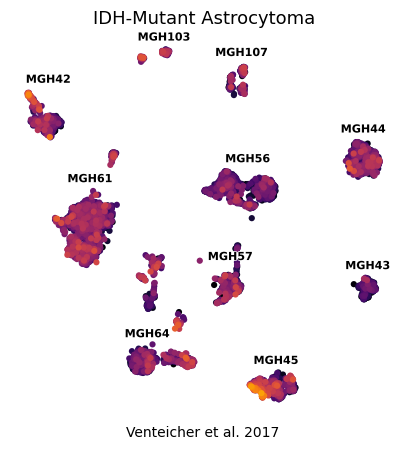

In [5]:
name = 'Data_Venteicher2017_Brain'
adata_plt = adata[adata.obs.Name == name].copy()

fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sc.pl.umap(adata_plt, color = 'latent_z', size = 80,
           cmap = cmap, vmin = vmin, vmax = vmax,
           frameon = False, colorbar_loc = None,
           show = False, ax = ax)
sc.pl.umap(adata_plt, color = 'sample', size = 80, alpha = 0,
           legend_loc = 'on data', legend_fontsize = 8,
           na_in_legend = False, legend_fontoutline = 1,
           frameon = False, show = False, ax = ax)

pos_dict = {
    'MGH42'  : (0, 7.5),
    'MGH43'  : (0, 3.75),
    'MGH44'  : (0, 5.5),
    'MGH45'  : (0, 4.75),
    'MGH56'  : (1.75, 5),
    'MGH57'  : (0, 5.25),
    'MGH61'  : (0, 7.5),
    'MGH64'  : (0, 4.75),
    'MGH103' : (0, 2.66),
    'MGH107' : (0, 5.5)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

ax.set_title(adata_plt.obs.Disease.cat.categories[0], size = 13)
ax.text(.3, -.05, adata_plt.obs.Title.cat.categories[0], transform = ax.transAxes)
fn = os.path.join(pth_out, 'embedding.pdf')
plt.savefig(fn, bbox_inches = 'tight')